In [7]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1 * x1 + w2 * x2

    if tmp <= theta:
        return 0

    else:
        return 1


print(AND(1,1))

1


In [8]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
## w * x 乘积是一个矩阵 sum 进行求和
print(np.sum(w * x) + b)  ## 矩阵相乘 加上偏置矩阵


-0.19999999999999996


In [9]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7

    # 计算临时变量
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0

    else:
        return 1

In [10]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5]) # 权重和偏置与and不一样

    b = 0.7

    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0

    else:
        return 1

        

In [11]:
def OR(x1,x2):
    x = np.array([x1,x2])  ## array中传入的是列表
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(w * x) + b

    if tmp <= 0:
        return 0

    else:
        return 1



In [12]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [13]:
import numpy as np

x = np.array([-1.0,1.0,2.0])

y = x > 0


def step_function(x):
    y = x > 0
    return y.astype(np.int)  ## 将布尔类型的数组转换成int类型



In [14]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    y = x > 0

    return y.astype(np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1) ## 指定y轴的范围
plt.show()


<Figure size 640x480 with 1 Axes>

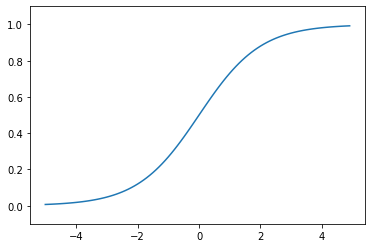

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [16]:
def relu(x):
    return np.maximum(0,x)
    

In [17]:
import numpy as np

A = np.array([1,2,3,4])

print(np.ndim(A))
A.shape

1


(4,)

In [18]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

print(np.dot(A,B))

[[19 22]
 [43 50]]


In [19]:
X = np.array([1,2])
X.shape

W = np.array([[1,2,3],[2,4,6]])

W.shape

Y = np.dot(X,W)
print(Y)

[ 5 10 15]


In [20]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1) + B1
print(A1) # 1 x 3 矩阵

# 激活
Z1 = sigmoid(A1)
print(Z1)


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [31]:
import numpy as np
Xu = np.array([[0,0.5],[1,0.25]])
Wu = np.array([-1,-1])
Bu = np.array([-1,-1])

Au1 = np.dot(Xu,Wu) + Bu

Zu1 = sigmoid(Au1)

Au2 = np.dot(Zu1,Wu) + Bu

Zu2 = sigmoid(Au2)

print(Zu2)

def mean_squared_error(y, t):
    return np.sum((y-t)**2)

t = np.array([0.5,0.25])

print(mean_squared_error(sigmoid(np.dot(sigmoid(np.dot(Xu,Wu) + Bu),Wu) + Bu),t))

[0.21792921 0.21792921]
0.0805924675606971


In [22]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2) + B2
print(A2)

Z2 = sigmoid(A2)

[0.51615984 1.21402696]


In [23]:
def identity_function(x):
 
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)
print(Y)


[0.31682708 0.69627909]


In [24]:
## 初始化参数和偏置
def init_network():
    network = {}
    network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,x):
    W1,W2,W3 = network['w1'],network['w2'],network['w3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    z3 = identity_function(a3)
    return z3

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)


[0.31682708 0.69627909]


In [25]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  ## 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a


    return y

In [26]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)

print(y)

[0.01821127 0.24519181 0.73659691]
